In [2]:
import pandas as pd
import numpy as np

# Parameters for generating synthetic data
n_rows = 5000  # Example dataset size

# Define possible values for categorical features
disaster_types = ['Flood', 'Earthquake', 'Wildfire', 'Hurricane', 'Landslide']
severity_levels = ['Low', 'Medium', 'Severe']
locations = ['Urban', 'Rural', 'Suburban']
weather_conditions = ['Clear', 'Rainy', 'Stormy', 'Dry']

# Generate synthetic data
np.random.seed(42)  # For reproducibility

data = {
    'Disaster Type': np.random.choice(disaster_types, n_rows),
    'Severity': np.random.choice(severity_levels, n_rows),
    'Affected Population': np.random.randint(500, 100000, n_rows),
    'Location': np.random.choice(locations, n_rows),
    'Available Medical Kits': np.random.randint(100, 1000, n_rows),
    'Available Food Packages': np.random.randint(500, 5000, n_rows),
    'Available Water Supplies': np.random.randint(500, 3000, n_rows),
    'Available Shelters': np.random.randint(50, 500, n_rows),
    'Weather Conditions': np.random.choice(weather_conditions, n_rows),
    'Immediate Needs Priority': np.random.choice(['Medical Supplies', 'Food & Water', 'Shelters'], n_rows),
    'Vulnerability Index': np.round(np.random.uniform(0.1, 1.0, n_rows), 2),
    'Infrastructure Damage': np.random.choice(['Low', 'Moderate', 'Severe'], n_rows),
    'Response Delay Time (hours)': np.random.randint(1, 48, n_rows)
}

# Create a DataFrame
synthetic_dataset = pd.DataFrame(data)

# Display the first few rows of the synthetic dataset
synthetic_dataset.tail()


,Disaster Type,Severity,Affected Population,Location,Available Medical Kits,Available Food Packages,Available Water Supplies,Available Shelters,Weather Conditions,Immediate Needs Priority,Vulnerability Index,Infrastructure Damage,Response Delay Time (hours)
4995,Hurricane,Medium,1481,Rural,545,3603,1777,494,Dry,Medical Supplies,0.23,Low,27
4996,Hurricane,Low,43936,Urban,124,826,2451,256,Stormy,Medical Supplies,0.28,Low,45
4997,Landslide,Low,18972,Rural,607,573,2795,466,Stormy,Food & Water,0.80,Severe,29
4998,Hurricane,Low,19836,Rural,197,750,2945,488,Rainy,Shelters,0.25,Moderate,12
4999,Landslide,Severe,26087,Rural,367,2997,2750,214,Dry,Shelters,0.38,Moderate,35


In [4]:
# Update file path to ensure accessibility for download
file_path = 'synthetic_disaster_resource_allocation.csv'
synthetic_dataset.to_csv(file_path, index=False)

file_path


'synthetic_disaster_resource_allocation.csv'

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import numpy as np

# 1. Handle Missing Values (if any exist)
# Fill missing numerical values with median
synthetic_dataset.fillna(synthetic_dataset.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
for col in synthetic_dataset.select_dtypes(include='object').columns:
    synthetic_dataset[col].fillna(synthetic_dataset[col].mode()[0], inplace=True)

# 2. Encode Categorical Variables
# One-Hot Encode non-ordinal categorical columns
ohe = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['Disaster Type', 'Location', 'Weather Conditions', 'Immediate Needs Priority']
encoded_categorical = ohe.fit_transform(synthetic_dataset[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=ohe.get_feature_names_out(categorical_cols))

# Label Encode the 'Severity' column (ordinal relationship)
severity_encoder = LabelEncoder()
synthetic_dataset['Severity_encoded'] = severity_encoder.fit_transform(synthetic_dataset['Severity'])

# Drop original categorical columns and concatenate the encoded ones
processed_data = pd.concat([synthetic_dataset.drop(columns=categorical_cols + ['Severity']), encoded_categorical_df], axis=1)

# 3. Scale Numerical Features
scaler = StandardScaler()
numerical_cols = ['Affected Population', 'Available Medical Kits', 'Available Food Packages', 
                  'Available Water Supplies', 'Available Shelters', 'Vulnerability Index', 'Response Delay Time (hours)']

# Scale numerical features
processed_data[numerical_cols] = scaler.fit_transform(processed_data[numerical_cols])

# 4. Generate New Features (Example: Resource Scarcity Ratios and Severity-Population Product)
processed_data['Resource_Medical_Scarcity'] = processed_data['Available Medical Kits'] / (processed_data['Affected Population'] + 1)
processed_data['Resource_Food_Scarcity'] = processed_data['Available Food Packages'] / (processed_data['Affected Population'] + 1)
processed_data['Severity_Population_Product'] = processed_data['Severity_encoded'] * processed_data['Affected Population']

# 5. Split the Data
train_data, test_data = train_test_split(processed_data, test_size=0.2, random_state=42)

# Output the first few rows of the processed training data to verify
train_data.head()


/Users/dhanarahulsainadiminti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Affected Population,Available Medical Kits,Available Food Packages,Available Water Supplies,Available Shelters,Vulnerability Index,Infrastructure Damage,Response Delay Time (hours),Severity_encoded,Disaster Type_Flood,...,Location_Suburban,Location_Urban,Weather Conditions_Dry,Weather Conditions_Rainy,Weather Conditions_Stormy,Immediate Needs Priority_Medical Supplies,Immediate Needs Priority_Shelters,Resource_Medical_Scarcity,Resource_Food_Scarcity,Severity_Population_Product
4227,-1.301765,0.521312,-0.681853,-0.349782,1.103518,0.009430,Moderate,-0.872532,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.727543,2.259548,-1.301765
4676,0.395513,1.595172,0.267332,-0.374611,0.921533,1.011775,Moderate,1.266786,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.143073,0.191566,0.000000
800,-0.914443,0.788808,1.268517,0.368872,0.352833,0.125085,Severe,-1.093840,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.219688,14.826589,-0.000000
3671,-0.616074,0.649245,0.255691,-0.173222,-1.565585,0.626257,Low,-0.134836,2,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.691069,0.665990,-1.232149
4193,0.318990,0.083239,-0.843284,0.185415,1.323415,-1.301329,Low,-0.872532,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.063108,-0.639341,0.000000


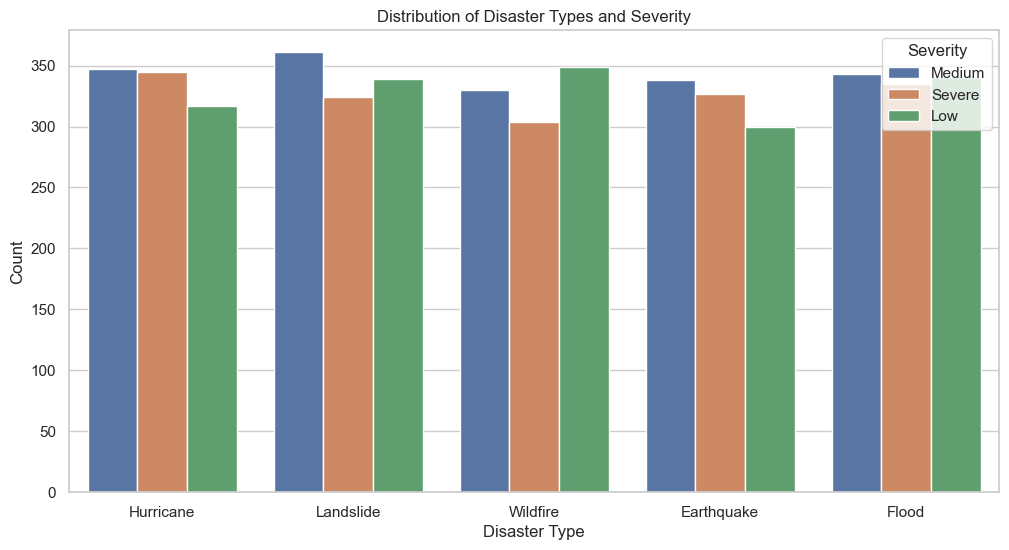

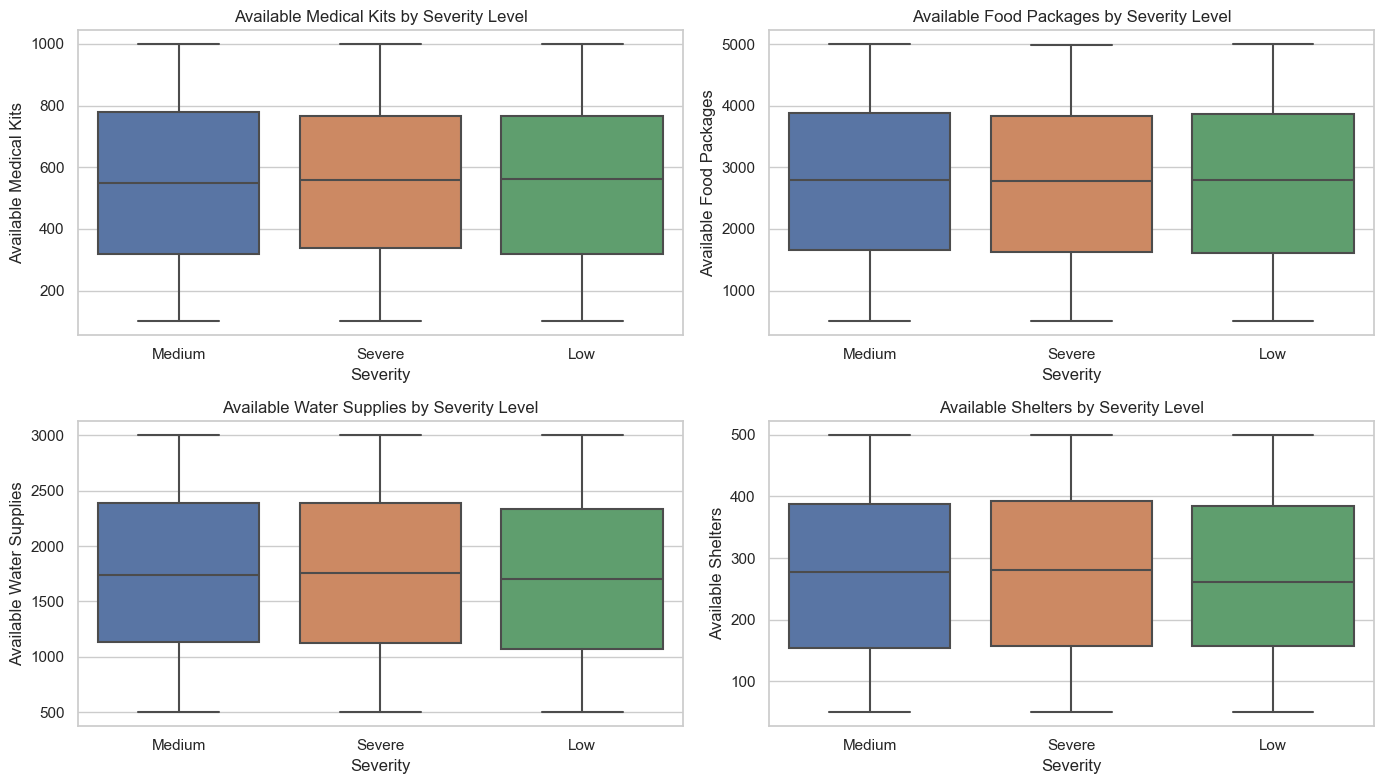

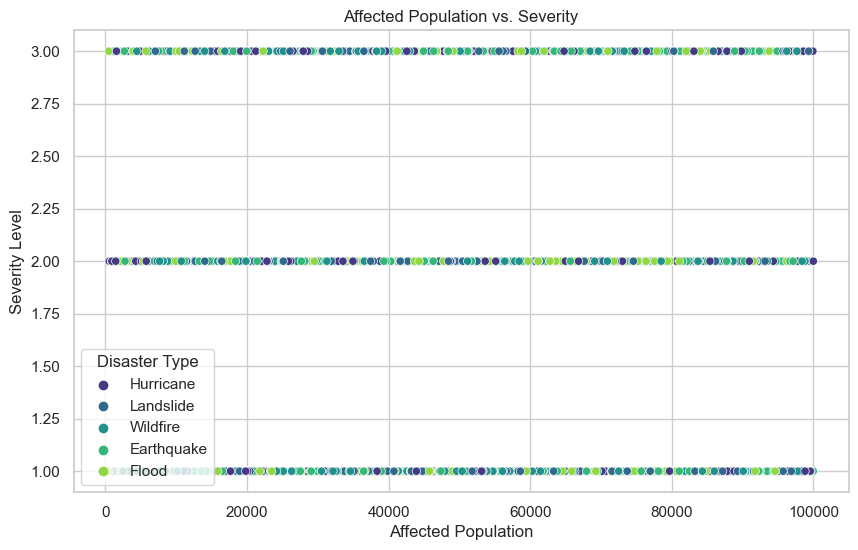

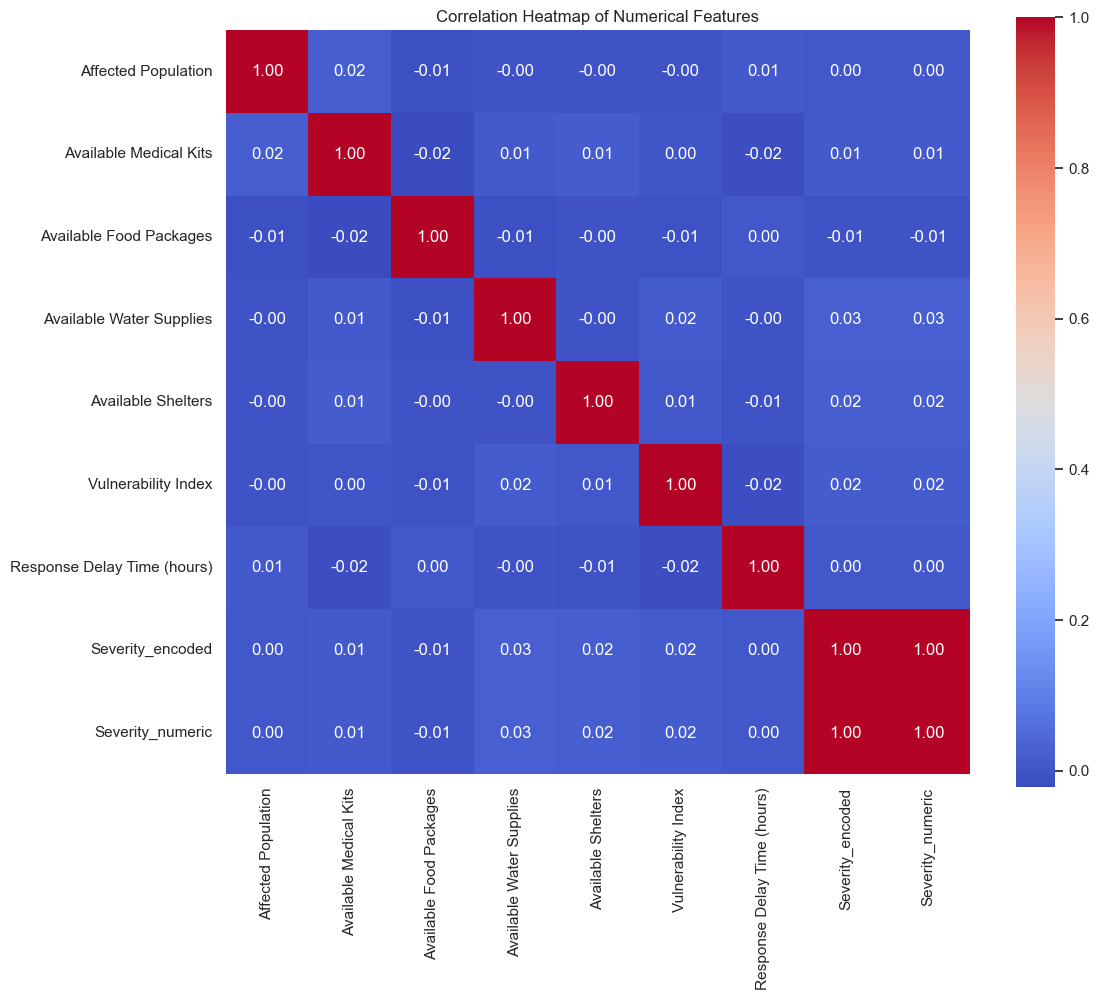

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a consistent style for plots
sns.set(style="whitegrid")

# 1. Distribution of Disaster Types and Severity
plt.figure(figsize=(12, 6))
sns.countplot(data=synthetic_dataset, x='Disaster Type', hue='Severity')
plt.title('Distribution of Disaster Types and Severity')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

# 2. Resource Availability by Severity Level (Box Plots)
resource_cols = ['Available Medical Kits', 'Available Food Packages', 'Available Water Supplies', 'Available Shelters']
plt.figure(figsize=(14, 8))
for i, col in enumerate(resource_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=synthetic_dataset, x='Severity', y=col)
    plt.title(f'{col} by Severity Level')
    plt.xlabel('Severity')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# 3. Scatter Plot of Affected Population vs. Severity
plt.figure(figsize=(10, 6))
severity_order = {'Low': 1, 'Medium': 2, 'Severe': 3}  # Encoding severity for plot
synthetic_dataset['Severity_numeric'] = synthetic_dataset['Severity'].map(severity_order)
sns.scatterplot(data=synthetic_dataset, x='Affected Population', y='Severity_numeric', hue='Disaster Type', palette='viridis')
plt.title('Affected Population vs. Severity')
plt.xlabel('Affected Population')
plt.ylabel('Severity Level')
plt.show()

# 4. Heatmap of Correlations (Numeric Columns Only)
plt.figure(figsize=(12, 10))

# Select only numeric columns for correlation calculation
numeric_columns = synthetic_dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [8]:
# # Rename labels in the dataset
# # Change Severity labels: "Severe" -> "severe", "Medium" -> "mild", "Low" -> "little_or_none"
# severity_mapping = {
#     "Severe": "severe",
#     "Medium": "mild",
#     "Low": "little_or_none"
# }
# synthetic_dataset["Severity"] = synthetic_dataset["Severity"].replace(severity_mapping)

# # Change Disaster Type labels: "Wildfire" -> "Fire"
# disaster_type_mapping = {
#     "Wildfire": "Fire"
# }
# synthetic_dataset["Disaster Type"] = synthetic_dataset["Disaster Type"].replace(disaster_type_mapping)

# # Save the updated dataset to a new CSV file
# new_file_path = "updated_synthetic_disaster_resource_allocationsss.csv"
# synthetic_dataset.to_csv(new_file_path, index=False)

# new_file_path


'updated_synthetic_disaster_resource_allocationsss.csv'

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("disaster_severity_dataset_v2.csv")

# Fill or drop missing values if any
df.fillna(0, inplace=True)

# Label encode categorical columns
label_enc = LabelEncoder()
df['Disaster_Type'] = label_enc.fit_transform(df['Disaster_Type'])
df['Severity'] = label_enc.fit_transform(df['Severity'])
df['Location'] = label_enc.fit_transform(df['Location'])
df['Weather_Conditions'] = label_enc.fit_transform(df['Weather_Conditions'])
df['Immediate_Needs_Priority'] = label_enc.fit_transform(df['Immediate_Needs_Priority'])
df['Vulnerability_Index'] = label_enc.fit_transform(df['Vulnerability_Index'])
df['Infrastructure_Damage'] = label_enc.fit_transform(df['Infrastructure_Damage'])

# Convert Response Delay Time to numeric (in hours)
df['Response_Delay_Time'] = df['Response_Delay_Time'].str.replace(" hours", "").astype(float)

# Feature Scaling
scaler = StandardScaler()
num_cols = ['Affected_Population', 'Available_Medical_Kits', 'Available_Food_Packages', 'Response_Delay_Time']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split the dataset into training and test sets
X = df.drop(['Immediate_Needs_Priority'], axis=1)  # Features
y = df['Immediate_Needs_Priority']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Ready for model training.")


Preprocessing complete. Ready for model training.


In [21]:
import os
import pandas as pd

# Load the dataset
file_path = '/Users/dhanarahulsainadiminti/Downloads/updated_synthetic_disaster_resource_allocationsss.csv'
data = pd.read_csv(file_path)

# Define allocation percentages based on severity level
allocation_map = {
    'little_or_none': 0.2,  # Allocate 20% of resources
    'mild': 0.5,            # Allocate 50% of resources
    'severe': 0.8           # Allocate 80% of resources
}

# Calculate allocated resources based on severity level
data['Allocated Medical Kits'] = data['Available Medical Kits'] * data['Severity'].map(allocation_map)
data['Allocated Food Packages'] = data['Available Food Packages'] * data['Severity'].map(allocation_map)
data['Allocated Water Supplies'] = data['Available Water Supplies'] * data['Severity'].map(allocation_map)
data['Allocated Shelters'] = data['Available Shelters'] * data['Severity'].map(allocation_map)

# Define the path for the updated CSV file
updated_file_path = '/Users/dhanarahulsainadiminti/Downloads/synthetic_disaster_resource_allocation_copy.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(updated_file_path), exist_ok=True)

# Save the updated dataset to a new CSV file
data.to_csv(updated_file_path, index=False)


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Load the dataset
file_path = '/Users/dhanarahulsainadiminti/Downloads/synthetic_disaster_resource_allocation_copy.csv'
data = pd.read_csv(file_path)

# Define the input (features) and output (target) columns
input_columns = ['Severity', 'Affected Population', 'Available Medical Kits', 'Available Food Packages', 'Available Shelters']
output_columns = ['Allocated Medical Kits', 'Allocated Food Packages', 'Allocated Water Supplies', 'Allocated Shelters', 'Immediate Needs Priority']

# Convert categorical 'Severity' to numeric, if needed
data['Severity'] = data['Severity'].map({'little_or_none': 0, 'mild': 1, 'severe': 2})

# Splitting the data into input and output
X = data[input_columns]
y = data[output_columns]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Save the trained model to a .pkl file
model_file_path = '/Users/dhanarahulsainadiminti/Downloads/random_forest_model.pkl'
joblib.dump(model, model_file_path)

print(f"Model saved at: {model_file_path}")


ValueError: could not convert string to float: 'Food & Water'

In [25]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [26]:
df = pd.read_csv('/Users/dhanarahulsainadiminti/Downloads/synthetic_disaster_resource_allocation_copy.csv')
df.head()

,Disaster Type,Severity,Affected Population,Location,Available Medical Kits,Available Food Packages,Available Water Supplies,Available Shelters,Weather Conditions,Immediate Needs Priority,Vulnerability Index,Infrastructure Damage,Response Delay Time (hours),Severity_encoded,Severity_numeric,Allocated Medical Kits,Allocated Food Packages,Allocated Water Supplies,Allocated Shelters
0,Hurricane,mild,70187,Urban,765,3964,1405,351,Stormy,Food & Water,0.72,Low,21,1,2,382.5,1982.0,702.5,175.5
1,Landslide,severe,72447,Suburban,320,2287,2902,197,Dry,Food & Water,0.37,Moderate,1,2,3,256.0,1829.6,2321.6,157.6
2,Fire,mild,96824,Suburban,468,1183,1032,270,Stormy,Food & Water,0.61,Low,9,1,2,234.0,591.5,516.0,135.0
3,Landslide,mild,51403,Urban,446,1632,795,235,Dry,Shelters,0.65,Severe,3,1,2,223.0,816.0,397.5,117.5
4,Landslide,severe,92659,Rural,124,4622,797,404,Rainy,Shelters,0.48,Moderate,42,2,3,99.2,3697.6,637.6,323.2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Disaster Type                5000 non-null   object 
 1   Severity                     5000 non-null   object 
 2   Affected Population          5000 non-null   int64  
 3   Location                     5000 non-null   object 
 4   Available Medical Kits       5000 non-null   int64  
 5   Available Food Packages      5000 non-null   int64  
 6   Available Water Supplies     5000 non-null   int64  
 7   Available Shelters           5000 non-null   int64  
 8   Weather Conditions           5000 non-null   object 
 9   Immediate Needs Priority     5000 non-null   object 
 10  Vulnerability Index          5000 non-null   float64
 11  Infrastructure Damage        5000 non-null   object 
 12  Response Delay Time (hours)  5000 non-null   int64  
 13  Severity_encoded  

In [28]:
df.describe()

,Affected Population,Available Medical Kits,Available Food Packages,Available Water Supplies,Available Shelters,Vulnerability Index,Response Delay Time (hours),Severity_encoded,Severity_numeric,Allocated Medical Kits,Allocated Food Packages,Allocated Water Supplies,Allocated Shelters
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,50032.449200,551.528600,2759.549200,1742.580400,273.468600,0.547554,23.827800,0.99780,1.99780,276.094360,1376.195720,874.602680,137.184900
std,28883.252297,257.973745,1288.602435,725.038901,131.892722,0.259418,13.557083,0.81014,0.81014,196.185106,976.420304,590.546369,100.372621
min,505.000000,100.000000,500.000000,500.000000,50.000000,0.100000,1.000000,0.00000,1.00000,20.000000,100.400000,100.200000,10.000000
25%,24608.750000,327.000000,1635.750000,1115.000000,157.000000,0.320000,12.000000,0.00000,1.00000,121.000000,592.450000,405.475000,55.800000
50%,50460.000000,556.000000,2787.500000,1735.500000,273.000000,0.550000,24.000000,1.00000,2.00000,204.800000,1053.050000,697.500000,99.200000
75%,74784.500000,771.000000,3863.250000,2375.500000,387.000000,0.770000,36.000000,2.00000,3.00000,414.625000,2033.600000,1258.375000,205.000000
max,99989.000000,999.000000,4999.000000,2999.000000,499.000000,1.000000,47.000000,2.00000,3.00000,799.200000,3995.200000,2398.400000,399.200000


In [29]:
df.isnull().any()

Disaster Type                  False
Severity                       False
Affected Population            False
Location                       False
Available Medical Kits         False
Available Food Packages        False
Available Water Supplies       False
Available Shelters             False
Weather Conditions             False
Immediate Needs Priority       False
Vulnerability Index            False
Infrastructure Damage          False
Response Delay Time (hours)    False
Severity_encoded               False
Severity_numeric               False
Allocated Medical Kits         False
Allocated Food Packages        False
Allocated Water Supplies       False
Allocated Shelters             False
dtype: bool

In [30]:
df.isnull().sum()

Disaster Type                  0
Severity                       0
Affected Population            0
Location                       0
Available Medical Kits         0
Available Food Packages        0
Available Water Supplies       0
Available Shelters             0
Weather Conditions             0
Immediate Needs Priority       0
Vulnerability Index            0
Infrastructure Damage          0
Response Delay Time (hours)    0
Severity_encoded               0
Severity_numeric               0
Allocated Medical Kits         0
Allocated Food Packages        0
Allocated Water Supplies       0
Allocated Shelters             0
dtype: int64

In [38]:
corr = df.corr()
corr

ValueError: could not convert string to float: 'Urban'

In [32]:
# Check data types to identify non-numeric columns
print(data.dtypes)


Disaster Type                   object
Severity                         int64
Affected Population              int64
Location                        object
Available Medical Kits           int64
Available Food Packages          int64
Available Water Supplies         int64
Available Shelters               int64
Weather Conditions              object
Immediate Needs Priority        object
Vulnerability Index            float64
Infrastructure Damage           object
Response Delay Time (hours)      int64
Severity_encoded                 int64
Severity_numeric                 int64
Allocated Medical Kits         float64
Allocated Food Packages        float64
Allocated Water Supplies       float64
Allocated Shelters             float64
dtype: object


In [35]:
# Perform one-hot encoding on categorical columns (example with 'Disaster Type')
df = pd.get_dummies(df, columns=['Disaster Type'], prefix='Disaster')


In [37]:
df = pd.get_dummies(df, columns=['Severity'])


KeyError: "['Location', 'Weather Conditions', 'Infrastructure Damage'] not found in axis"

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
file_path = '/Users/dhanarahulsainadiminti/Downloads/rs.csv'
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

# Define input and output columns
input_columns = ['Severity', 'Affected Population', 'Available Medical Kits', 'Available Food Packages', 'Available Shelters']
output_columns = ['Allocated Medical Kits', 'Allocated Food Packages', 'Allocated Water Supplies', 'Allocated Shelters', 'Immediate Needs Priority']


# Separate inputs and outputs
X = data[input_columns]
y = data[output_columns]

# Preprocessing for categorical data (One-hot encoding for 'Severity')
categorical_features = ['Severity']
categorical_transformer = OneHotEncoder(drop='first')  # Drop one to avoid multicollinearity

# ColumnTransformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Pipeline to transform data and apply regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Example of saving model to .pkl file if needed
import joblib
joblib.dump(model, 'random_forest_regressor.pkl')


  Disaster Type Severity  Affected Population  Location  \
0     Hurricane     mild                70187     Urban   
1     Landslide   severe                72447  Suburban   
2          Fire     mild                96824  Suburban   
3     Landslide     mild                51403     Urban   
4     Landslide   severe                92659     Rural   

   Available Medical Kits  Available Food Packages  Available Water Supplies  \
0                     765                     3964                      1405   
1                     320                     2287                      2902   
2                     468                     1183                      1032   
3                     446                     1632                       795   
4                     124                     4622                       797   

   Available Shelters Weather Conditions Immediate Needs Priority  \
0                 351             Stormy             Food & Water   
1                 197     

ValueError: could not convert string to float: 'Food & Water'

In [3]:
# Inspect column names to ensure they match
print(data.columns)


Index(['synthetic_disaster_resource_allocation_copy'], dtype='object')


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
file_path = '/Users/dhanarahulsainadiminti/Downloads/rs.csv'  # Adjust path as needed
data = pd.read_csv(file_path)

# Define input and output columns
input_columns = ['Severity', 'Affected Population', 'Available Medical Kits',
                 'Available Food Packages', 'Available Shelters', 'Available Water Supplies']
output_columns = ['Allocated Medical Kits', 'Allocated Food Packages', 'Allocated Water Supplies', 
                  'Allocated Shelters', 'Immediate Needs Priority']

# Separate inputs and outputs
X = data[input_columns]
y = data[output_columns]

# Preprocessing for categorical data (One-hot encoding for 'Severity' and 'Immediate Needs Priority')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Severity']),
        ('scale', StandardScaler(), ['Affected Population', 'Available Medical Kits', 
                                     'Available Food Packages', 'Available Shelters', 'Available Water Supplies'])
    ],
    remainder='passthrough'
)

# One-hot encode 'Immediate Needs Priority' in the output data
y = pd.get_dummies(y, columns=['Immediate Needs Priority'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first applies preprocessing then fits a Random Forest Regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print mean squared error for each output variable
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Errors for each output variable:", mse)


Mean Squared Errors for each output variable: [1.85004841e+03 1.39946526e+03 1.41208474e+03 2.75688346e+03
 2.58991500e-01 2.47865900e-01 2.43671800e-01]


In [7]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/Users/dhanarahulsainadiminti/Downloads/rs.csv')

# Define input and output columns
input_columns = [
    'Severity', 'Affected Population', 'Available Medical Kits',
    'Available Food Packages', 'Available Shelters', 'Available Water'
]
output_columns = [
    'Allocated Medical Kits', 'Allocated Food Packages', 'Allocated Water Supplies',
    'Allocated Shelters', 'Immediate Needs Priority'
]

# Separate inputs and outputs
X = data[input_columns]
y = data[output_columns]

# Define categorical and numerical columns for input features
categorical_features = ['Severity']
numerical_features = [
    'Affected Population', 'Available Medical Kits', 'Available Food Packages',
    'Available Shelters', 'Allocated Water Supplies'
]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Random forest regressor
regressor = RandomForestRegressor(random_state=42)

# Full pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Hyperparameter grid for tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error', 
                                   random_state=42, n_jobs=-1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with hyperparameter tuning
random_search.fit(X_train, y_train)

# Make predictions
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate Mean Squared Error for each output variable
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Errors for each output variable:", mse)

# Calculate R² score (accuracy) for each output variable
r2_scores = [r2_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
print("R² Scores (Accuracy) for each output variable:", r2_scores)

# Calculate overall R² score
overall_r2_score = r2_score(y_test, y_pred, multioutput='variance_weighted')
print("Overall R² Score:", overall_r2_score)


KeyError: "['Available Water'] not in index"

In [9]:
# Load the dataset and display column names
data = pd.read_csv('/Users/dhanarahulsainadiminti/Downloads/rs.csv')
print(data.columns)


Index(['Disaster Type', 'Severity', 'Affected Population', 'Location',
       'Available Medical Kits', 'Available Food Packages',
       'Available Water Supplies', 'Available Shelters', 'Weather Conditions',
       'Immediate Needs Priority', 'Vulnerability Index',
       'Infrastructure Damage', 'Response Delay Time (hours)',
       'Severity_encoded', 'Severity_numeric', 'Allocated Medical Kits',
       'Allocated Food Packages', 'Allocated Water Supplies',
       'Allocated Shelters'],
      dtype='object')


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



# Load the dataset
file_path = '/Users/dhanarahulsainadiminti/Downloads/rs.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Define input columns and output columns
input_columns = [
    'Severity_encoded', 
    'Affected Population', 
    'Available Medical Kits', 
    'Available Food Packages', 
    'Available Water Supplies', 
    'Available Shelters'
]

output_columns = [
    'Allocated Medical Kits', 
    'Allocated Food Packages', 
    'Allocated Water Supplies', 
    'Allocated Shelters'
]

# Separate inputs and outputs
X = data[input_columns]
y = data[output_columns]

# Handling missing values, if any
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Define the preprocessing pipeline for numeric columns
numeric_features = ['Affected Population', 'Available Medical Kits', 'Available Food Packages', 'Available Water Supplies', 'Available Shelters']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the column transformer to apply the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a random forest regressor model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for each output variable
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')

print("Mean Squared Errors for each output variable:")
print(mse)

# Calculate accuracy (R^2) score for each output variable
r2_scores = model.score(X_test, y_test)
print("\nR^2 Scores for each output variable:")
print(r2_scores)



/var/folders/ks/ljk00dm1703810nybztmtjgw0000gn/T/ipykernel_10591/192985035.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
/var/folders/ks/ljk00dm1703810nybztmtjgw0000gn/T/ipykernel_10591/192985035.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)


Mean Squared Errors for each output variable:
[ 25460.528144   603209.32381529 224046.79233949   6538.20096013]

R^2 Scores for each output variable:
0.3487872026755856


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Define custom threshold for each output variable to convert them to categories
# You may need to adjust these thresholds based on your dataset
thresholds = {
    'Allocated Medical Kits': [0, 5000, 10000, 20000],
    'Allocated Food Packages': [0, 10000, 50000, 100000],
    'Allocated Water Supplies': [0, 10000, 50000, 100000],
    'Allocated Shelters': [0, 100, 500, 1000]
}

# Convert continuous outputs to categorical outputs based on thresholds
def categorize(values, thresholds):
    return np.digitize(values, thresholds)

# Apply categorization to each output variable
y_test_cat = np.array([categorize(y_test[col], thresholds[col]) for col in y.columns]).T
y_pred_cat = np.array([categorize(y_pred[:, i], thresholds[col]) for i, col in enumerate(y.columns)]).T

# Calculate accuracy for each output variable
accuracies = [accuracy_score(y_test_cat[:, i], y_pred_cat[:, i]) for i in range(y.shape[1])]

# Print accuracies
print("\nAccuracies for each output variable:")
for i, col in enumerate(y.columns):
    print(f"{col}: {accuracies[i]}")

# Generate and print confusion matrices for each output variable
print("\nConfusion Matrices for each output variable:")
for i, col in enumerate(y.columns):
    print(f"{col}:\n{confusion_matrix(y_test_cat[:, i], y_pred_cat[:, i])}\n")



Accuracies for each output variable:
Allocated Medical Kits: 1.0
Allocated Food Packages: 1.0
Allocated Water Supplies: 1.0
Allocated Shelters: 0.661

Confusion Matrices for each output variable:
Allocated Medical Kits:
[[1000]]

Allocated Food Packages:
[[1000]]

Allocated Water Supplies:
[[1000]]

Allocated Shelters:
[[225 296]
 [ 43 436]]



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


In [4]:
df= pd.read_csv('/Users/dhanarahulsainadiminti/Downloads/rs.csv')
print(df)

     Disaster Type        Severity  Affected Population  Location  \
0        Hurricane            mild                70187     Urban   
1        Landslide          severe                72447  Suburban   
2             Fire            mild                96824  Suburban   
3        Landslide            mild                51403     Urban   
4        Landslide          severe                92659     Rural   
...            ...             ...                  ...       ...   
4995     Hurricane            mild                 1481     Rural   
4996     Hurricane  little_or_none                43936     Urban   
4997     Landslide  little_or_none                18972     Rural   
4998     Hurricane  little_or_none                19836     Rural   
4999     Landslide          severe                26087     Rural   

      Available Medical Kits  Available Food Packages  \
0                        765                     3964   
1                        320                     2287   


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Disaster Type                5000 non-null   object 
 1   Severity                     5000 non-null   object 
 2   Affected Population          5000 non-null   int64  
 3   Location                     5000 non-null   object 
 4   Available Medical Kits       5000 non-null   int64  
 5   Available Food Packages      5000 non-null   int64  
 6   Available Water Supplies     5000 non-null   int64  
 7   Available Shelters           5000 non-null   int64  
 8   Weather Conditions           5000 non-null   object 
 9   Immediate Needs Priority     5000 non-null   object 
 10  Vulnerability Index          5000 non-null   float64
 11  Infrastructure Damage        5000 non-null   object 
 12  Response Delay Time (hours)  5000 non-null   int64  
 13  Severity_encoded  

In [6]:
input_columns = [
    'Severity_encoded', 
    'Affected Population', 
    'Available Medical Kits', 
    'Available Food Packages', 
    'Available Water Supplies', 
    'Available Shelters'
]

output_columns = [
    'Allocated Medical Kits', 
    'Allocated Food Packages', 
    'Allocated Water Supplies', 
    'Allocated Shelters'
]
X = df[input_columns]
y = df[output_columns]


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib
 
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)

model_filename = 'random_forest_model.joblib'
joblib.dump(regressor, model_filename)
print(f"Model saved as {model_filename}")

Model saved as random_forest_model.joblib


In [9]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(x)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.8358442051550137
Mean Squared Error: 472.9716750849998
R-squared: 0.9807556727300595


In [20]:
import numpy as np
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(X,y, color='blue') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='green') #plotting for predict points
  
plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


TypeError: arange() not supported for inputs with DType <class 'numpy.dtype[str_]'>.

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

# Load dataset
file_path = '/Users/dhanarahulsainadiminti/Downloads/rs.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Prepare features and target
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
y = df[['Allocated Medical Kits', 
        'Allocated Food Packages', 
        'Allocated Water Supplies', 
        'Allocated Shelters']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the base Random Forest Regressor with OOB score enabled
base_regressor = RandomForestRegressor(oob_score=True, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(base_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Fit the best model on training data
best_rf.fit(X_train, y_train)

# Check Out-of-Bag Score
print("Out-of-Bag Score:", best_rf.oob_score_)

# Predictions and evaluation
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature Importance Analysis
importances = best_rf.feature_importances_
feature_names = df.columns.drop('Target Column Name')  # Exclude the target column
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Optional: Ensemble Learning with Stacking
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(**grid_search.best_params_)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, random_state=42)
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_pred)
stacking_r2 = r2_score(y_test, stacking_pred)
print("Stacking Model Mean Squared Error:", stacking_mse)
print("Stacking Model R-squared:", stacking_r2)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Out-of-Bag Score: 0.9074568142802633
Mean Squared Error: 1856.8029388941864
R-squared: 0.9153268188144394


KeyError: "['Target Column Name'] not found in axis"

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load dataset
file_path = '/Users/dhanarahulsainadiminti/Downloads/rs.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Prepare features and target
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
y = df[['Allocated Medical Kits', 
        'Allocated Food Packages', 
        'Allocated Water Supplies', 
        'Allocated Shelters']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the base Random Forest Regressor with OOB score enabled
base_regressor = RandomForestRegressor(oob_score=True, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(base_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Fit the best model on training data
best_rf.fit(X_train, y_train)

# Check Out-of-Bag Score
print("Out-of-Bag Score:", best_rf.oob_score_)

# Predictions and evaluation
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature Importance Analysis
importances = best_rf.feature_importances_
target_columns = ['Allocated Medical Kits', 'Allocated Food Packages', 'Allocated Water Supplies', 'Allocated Shelters']
feature_names = df.columns.drop(target_columns)  # Exclude the target columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Optional: Ensemble Learning with Stacking
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(**grid_search.best_params_)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, random_state=42)
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_pred)
stacking_r2 = r2_score(y_test, stacking_pred)
print("Stacking Model Mean Squared Error:", stacking_mse)
print("Stacking Model R-squared:", stacking_r2)

# Save the best Random Forest model
best_rf_filename = 'best_random_forest_model.joblib'
joblib.dump(best_rf, best_rf_filename)
print(f"Best Random Forest model saved as {best_rf_filename}")

# Save the stacking model
stacking_model_filename = 'stacking_model.joblib'
joblib.dump(stacking_model, stacking_model_filename)
print(f"Stacking model saved as {stacking_model_filename}")


In [12]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model_filename = 'random_forest_model.joblib'
loaded_model = joblib.load(model_filename)

# Define a sample input (replace these values with your custom input data)
# Ensure these values match the format and order of the original dataset's features
sample_input = {
    'Disaster Type': 'Flood',        # Example categorical feature
    'Severity': 3,                   # Example numerical feature
    'Affected Population': 1000,     # Example numerical feature
    'Location': 'Urban',             # Example categorical feature
    'Available Medical Kits': 10,    # Example numerical feature
    'Available Food Packages': 50,   # Example numerical feature
    'Weather Conditions': 'Rainy',   # Example categorical feature
    'Immediate Needs Priority': 2,   # Example numerical feature
    'Vulnerability Index': 0.7,      # Example numerical feature
    'Infrastructure Damage': 1,      # Example numerical feature
    'Response Delay Time': 5         # Example numerical feature
}

# Convert the sample input into a DataFrame
sample_df = pd.DataFrame([sample_input])

# Encode categorical columns as done for training
label_encoder = LabelEncoder()
for col in sample_df.select_dtypes(include=['object']).columns:
    sample_df[col] = label_encoder.fit_transform(sample_df[col])

# Separate features into numerical and categorical
x_categorical = sample_df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = sample_df.select_dtypes(exclude=['object']).values
x_input = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Use the model to predict with the custom input
y_pred = loaded_model.predict(x_input)

print("Predicted Output for Custom Input:", y_pred)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values